In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px

In [3]:
path = '/content/ecommerce_dataset.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(10)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
5,3fdcdae8,0816ee12-5,Books,241.86,50,120.93,UPI,08-08-2024
6,12772337,d41e0b55-c,Toys,76.91,5,73.06,Credit Card,28-03-2024
7,9f0194af,83b7dc04-5,Sports,213.23,20,170.58,Net Banking,29-05-2024
8,7a8559d8,87c9c896-1,Sports,379.81,5,360.82,Credit Card,26-02-2024
9,8911f0d1,31308875-b,Home & Kitchen,415.36,50,207.68,Net Banking,11-01-2024


In [6]:
df.shape

(3660, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [8]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [9]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Category,0
Price (Rs.),0
Discount (%),0
Final_Price(Rs.),0
Payment_Method,0
Purchase_Date,0


In [13]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y', errors='coerce')

In [26]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-11-12
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-02-09
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-09-01
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,2024-04-01
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,2024-09-27


In [14]:
avg_costs = df.groupby('Category')['Final_Price(Rs.)'].mean().reset_index()


In [15]:
avg_costs

,Category,Final_Price(Rs.)
0,Beauty,206.366535
1,Books,208.144850
2,Clothing,217.165424
3,Electronics,201.731386
4,Home & Kitchen,200.961894
5,Sports,208.689981
6,Toys,205.142811


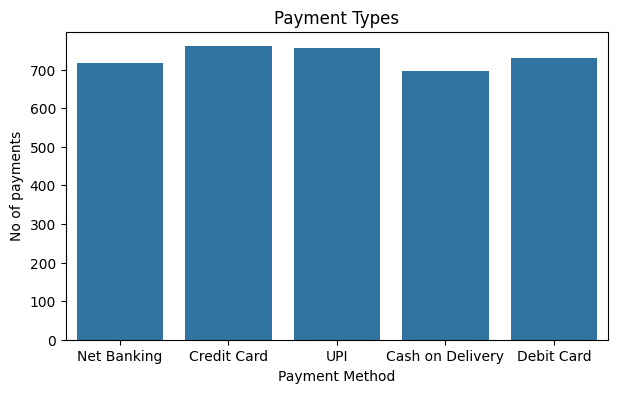

In [24]:
plt.figure(figsize=(7,4))
sns.countplot(x='Payment_Method', data=df)
plt.title('Payment Types')
plt.xlabel('Payment Method')
plt.ylabel('No of payments')
plt.show()


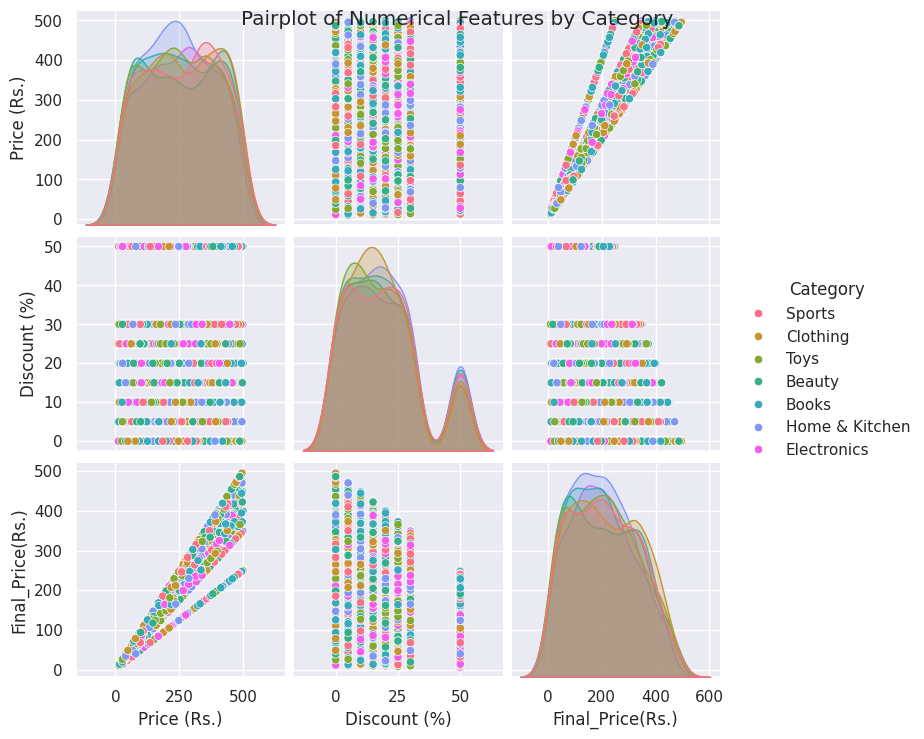

In [48]:
sns.pairplot(df, hue = 'Category', palette = 'husl')
plt.suptitle('Pairplot of Numerical Features by Category')
plt.show()

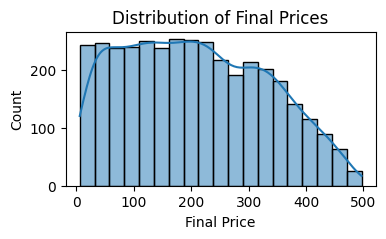

In [31]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Final_Price(Rs.)'], kde=True)
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price')
plt.ylabel('Count')
plt.show()

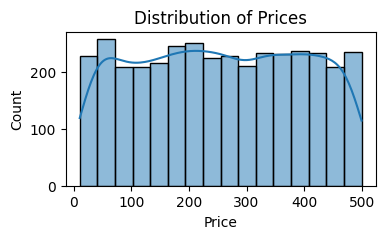

In [32]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Price (Rs.)'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

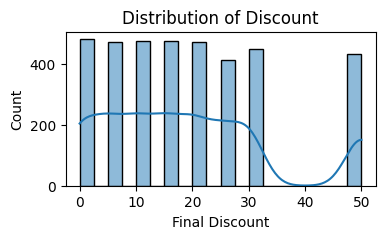

In [35]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Discount (%)'], kde=True)
plt.title('Distribution of Discount')
plt.xlabel('Final Discount')
plt.ylabel('Count')
plt.show()

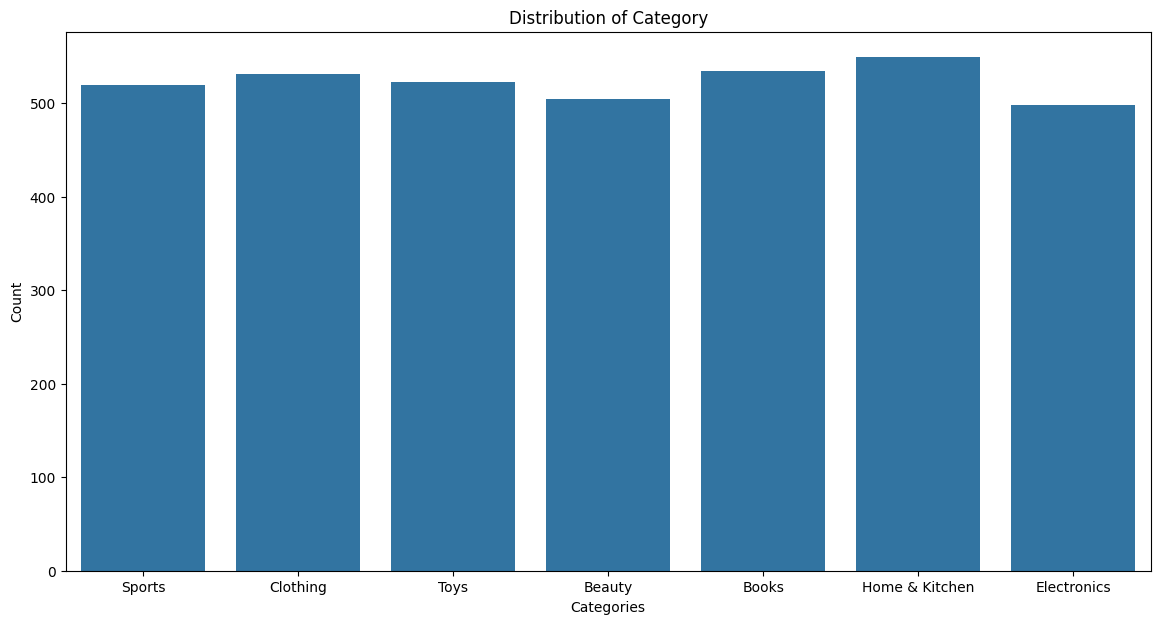

In [41]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

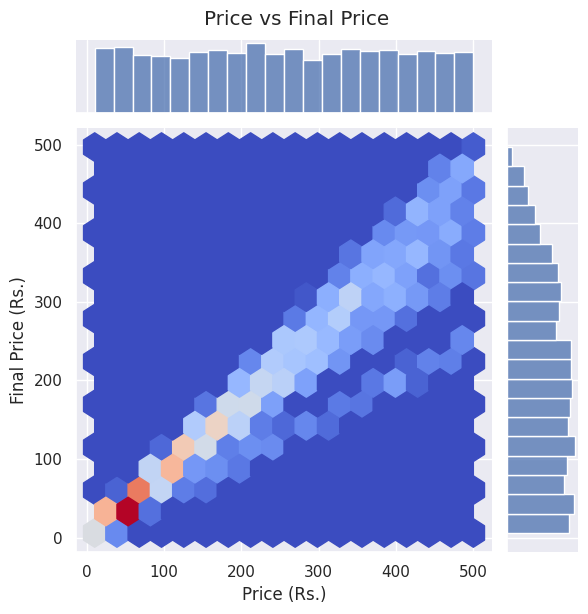

In [42]:
sns.set(rc = {'figure.figsize':(22,10)})
sns.jointplot(data=df, x='Price (Rs.)', y='Final_Price(Rs.)', kind='hex', cmap='coolwarm', marginal_kws={'bins':20, 'fill':True})
plt.suptitle('Price vs Final Price', y=1.02)
plt.xlabel('Price (Rs.)')
plt.ylabel('Final Price (Rs.)')
plt.show()

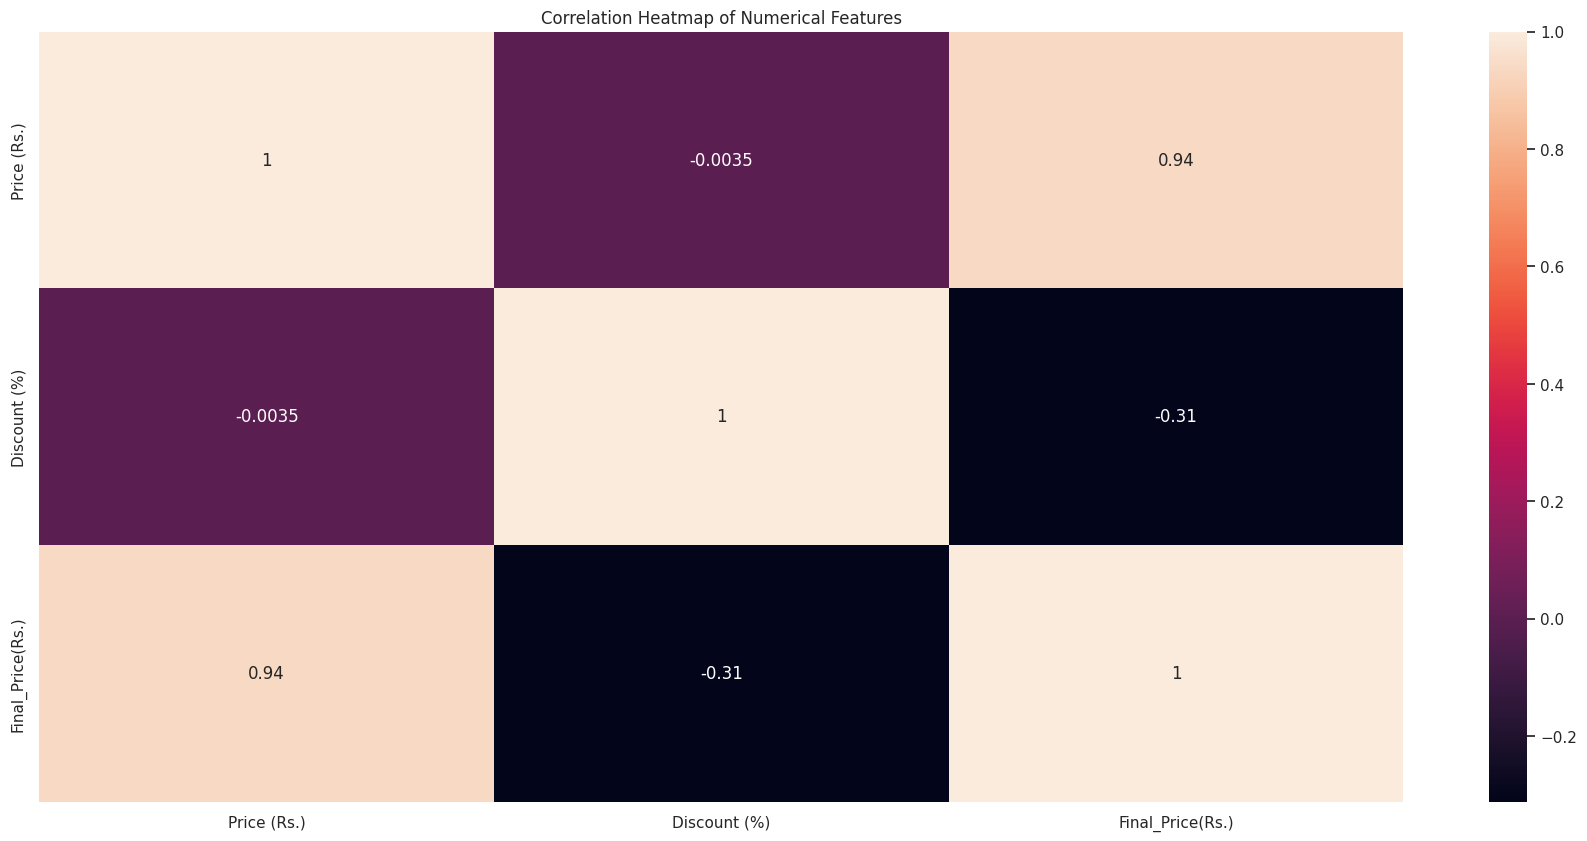

In [47]:
sns.set(rc = {'figure.figsize':(22,10)})
numerical_cols = ['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot = True, )
plt.title('Correlation Heatmap of Numerical Features')
plt.show()